# tryout validations of modelling influence diagrams for high tech systems

# prerequisites

In [8]:
%load_ext autoreload
%autoreload 2

In [9]:
import os
import sys
import re
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb
from IPython.display import display, HTML, clear_output
import pandas as pd
from itertools import product
import math

In [41]:
# Styling notebook
def css_styling():
    styles = open("./styles/custom.css", "r").read()
    return HTML(styles)
css_styling()

In [11]:
sys.path.insert(1, "/workspaces/ou-af/problem1/iteratie1")

In [12]:
# import de code
import src.system as system
import src.diagrambuilder as builder
import specs.components as componentspecs
import specs.connections as connectionspecs
import specs.assemblies as assemblyspecs
import specs.tests as testspecs

# reporting helpers

In [13]:
def visualizeStructure(diagram):
    display(HTML("<style>.container { width:100% !important; }</style>"))

    # print summary of nodes
    print(diagram)

    # view structure
    gnb.showInfluenceDiagram(diagram, size=60)

In [14]:
def showCPTs(diagram):
    nodes = diagram.nodes()
    for n in nodes:
        if(diagram.isChanceNode(n)):
            gnb.flow.row(diagram.cpt(n))

In [15]:
def createUtilityRow(nodelist):
    row_elements = [diagram.utility(node) for node in nodelist]
    gnb.flow.row(*row_elements)

def createCptRow(nodelist):
    row_elements = [diagram.cpt(node) for node in nodelist]
    gnb.flow.row(*row_elements)



In [16]:
def getDiagramChanceNodeIdsForComponent(componentname, diagram):
    idlist = []
    diagramNames = diagram.names()
    for dname in diagramNames:
        if(re.search(componentname + "$", dname)):
            nodeid = diagram.idFromName(dname)
            if (diagram.isChanceNode(nodeid)):
                idlist.append(nodeid)
    return idlist
    

def printCptTables(diagram, system):
    for component in system.getComponents():
        print("CPT tables for component: " + component.getName())
        createCptRow(getDiagramChanceNodeIdsForComponent(component.getName(), diagram))

In [17]:
def getDiagramUtilityNodeIdsForComponent(componentname, diagram):
    idlist = []
    diagramNames = diagram.names()
    for dname in diagramNames:
        if(re.search(componentname + "$", dname)):
            nodeid = diagram.idFromName(dname)
            if (diagram.isUtilityNode(nodeid)):
                idlist.append(nodeid)
    return idlist
    

def printUtilityTables(diagram, system):
    for component in system.getComponents():
        print("Utility tables for component: " + component.getName())
        createUtilityRow(getDiagramUtilityNodeIdsForComponent(component.getName(), diagram))

## create diagam

In [18]:
# gather specs for a system
# system = light + replacedecision + test
components = [componentspecs.light, componentspecs.switch]
connections = [connectionspecs.wire, connectionspecs.wire2]
tests = [testspecs.testObserveHealth]
assembly = {
    "components"  : components,
    "connections" : connections,
    "structure"   : assemblyspecs.structure0,
    "tests"       : tests,
    "testmapping" : testspecs.testmapping1
}

In [19]:
# read specifications, create system of objects
system = system.createSystemFromSpecs(assembly)

building system: structure1
number of components: 1
KeyError, no connections found
number of connections: 0
number of tests: 1


In [20]:
# create diagram object
diagram = gum.InfluenceDiagram()

In [21]:
diagram = builder.diagramBuilder(diagram, system)

adding component: Light
adding cpt for component: Light
adding Replace decision for component: Light
adding Replace utility for component: Light
adding test: TestObserveHealth to component: Light


In [22]:
def visualizeStructure(diagram):
    display(HTML("<style>.container { width:100% !important; }</style>"))

    # print summary of nodes
    print(diagram)

    # view structure
    gnb.showInfluenceDiagram(diagram, size=60)

## display diagram + tables

Influence Diagram{
  chance: 4,
  utility: 2,
  decision: 2,
  arcs: 7,
  domainSize: 96
}


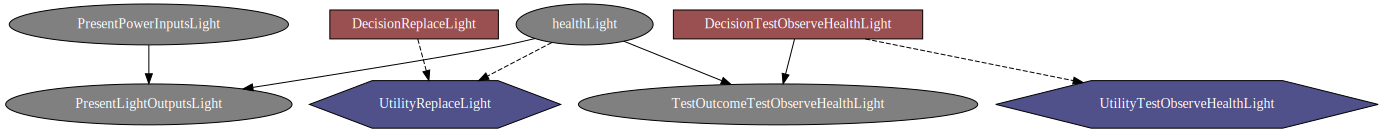

In [23]:
visualizeStructure(diagram)

In [24]:
showCPTs(diagram)

In [25]:
printUtilityTables(diagram, system)

Utility tables for component: Light


# validate modelling impact of system (input > output) on health

**Scenario:** when power then light is normal behavior

- **Given:** evidence input power present: yes
- **And:** evidence light:on  
- **When:** inference performed
- **Then:** belief health should be health:ok

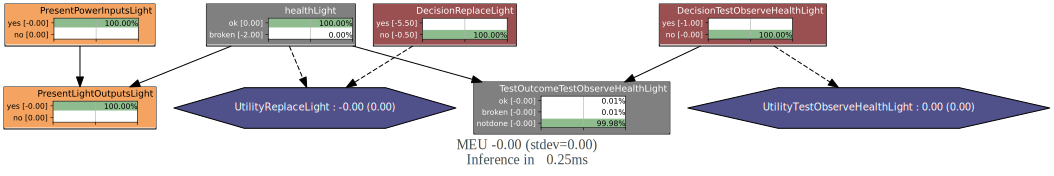

In [26]:
gnb.showInference(diagram, evs={
    "PresentPowerInputsLight":0,
    "PresentLightOutputsLight":0
#    "healthLight":1,
#    "DecisionReplaceLight": "no",
#    "TestOutcomeTestObserveHealthLight":1,
#    "DecisionTestObserveHealthLight": "yes",
}, size=40)

**Scenario:** when no power then no light is normal behavior

- **Given:** evidence input power present: no
- **And:** evidence light:no
- **When:** inference performed
- **Then:** belief health should be health:ok

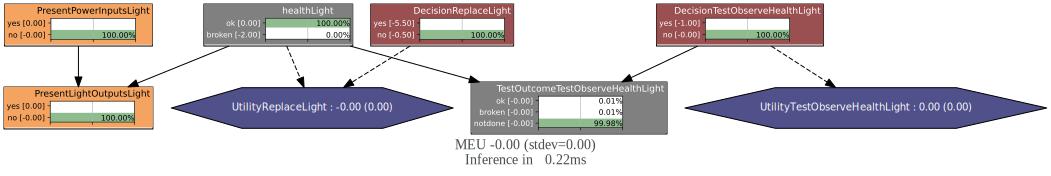

In [27]:
gnb.showInference(diagram, evs={
    "PresentPowerInputsLight":1,
    "PresentLightOutputsLight":1,
#    "healthLight":1,
#    "DecisionReplaceLight": "no",
#    "TestOutcomeTestObserveHealthLight":1,
#    "DecisionTestObserveHealthLight": "yes",
}, size=40)

**Scenario:** given no light but no evidence on input power belief in health is mixed

- **Given:** no evidence input power
- **And:** evidence light:no
- **When:** inference performed
- **Then:** belief health ok/broken is 50/50

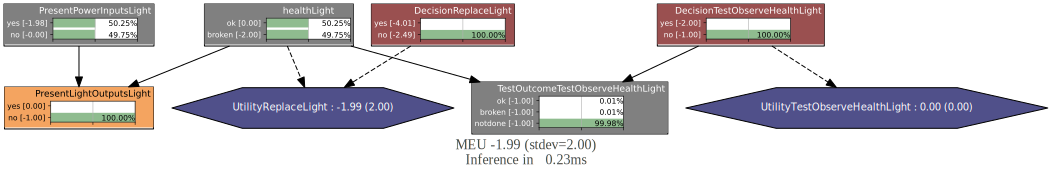

In [28]:
gnb.showInference(diagram, evs={
#    "PresentPowerInputsLight":0,
    "PresentLightOutputsLight":1,
#    "healthLight":1,
#    "DecisionReplaceLight": "no",
#    "TestOutcomeTestObserveHealthLight":1,
#    "DecisionTestObserveHealthLight": "yes",
}, size=40)

**Scenario:** given no light and no power on input belief health: broken, no normal behavior

- **Given:** evidence input power present: no
- **And:** evidence light:no
- **When:** inference performed
- **Then:** belief health should be health:broken

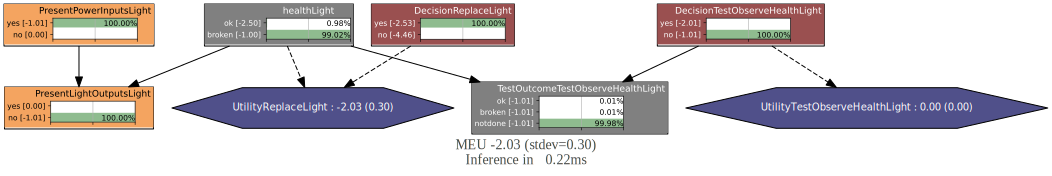

In [29]:
gnb.showInference(diagram, evs={
    "PresentPowerInputsLight":0,
    "PresentLightOutputsLight":1,
#    "healthLight":1,
#    "DecisionReplaceLight": "no",
#    "TestOutcomeTestObserveHealthLight":1,
#    "DecisionTestObserveHealthLight": "yes",
}, size=40)

**Scenario:** given there is light but no power

- **Given:** evidence input power present: no
- **And:** evidence light:yes
- **When:** inference performed
- **Then:** belief health should be health:broken

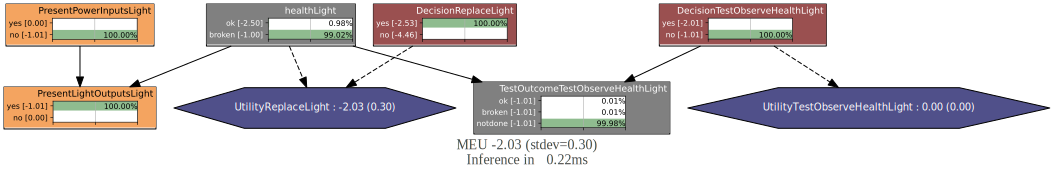

In [30]:
gnb.showInference(diagram, evs={
    "PresentPowerInputsLight":1,
    "PresentLightOutputsLight":0,
#    "healthLight":1,
#    "DecisionReplaceLight": "no",
#    "TestOutcomeTestObserveHealthLight":1,
#    "DecisionTestObserveHealthLight": "yes",
}, size=40)

The last 2 cases are due to the following table in specs for component light that defines normal behavior:

    "Behavior":{
        "normal": {
            'PresentPowerInputs':  ["yes", "no", "yes",    "no"], 
            'PresentLightOutputs': ["yes", "no", "no",    "yes"],
            'health':              ["ok",  "ok", "broken", "broken"]
            
Question: should this not be implemented via failure modes instead of normal behavior? Or can we define failure modes via this table also?


## validate modelling impact health on decision replace

### **Scenario:** given belief component health:broken advice to replace:yes

- **Given:** evidence input power present: yes
- **And:** evidence light:no
- **When:** inference performed
- **Then:** belief health light:broken
- **And:** advice replace light:yes

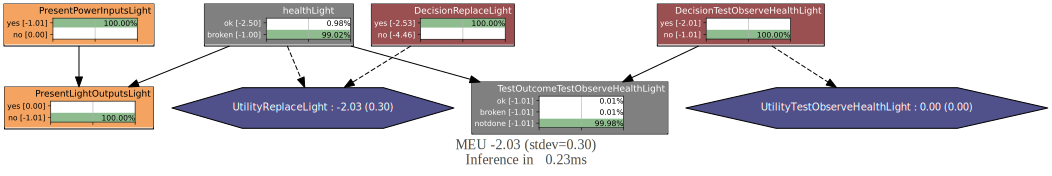

In [31]:
gnb.showInference(diagram, evs={
    "PresentPowerInputsLight":0,
    "PresentLightOutputsLight":1,
#    "healthLight":1,
#    "DecisionReplaceLight": "no",
#    "TestOutcomeTestObserveHealthLight":0,
#    "DecisionTestObserveHealthLight": "yes",
}, size=40)

In [32]:
# given following preference for decision, when health:broken > replacedecision: yes

gnb.flow.row(diagram.utility("UtilityReplaceLight"))

### berekening UtilityReplaceLight

utility belief Health + replace yes berekening: .9902 * -2 + .0098 * -5 = -2,03

utility belief health + replace no berekening: .9902 * -4 + .0098 * -0 = -3,96

### **Scenario:** changed preferences: when broken not replacing becomes preffered

In [33]:
diagram.utility(diagram.idFromName("UtilityReplaceLight"))[0,0] = -5
diagram.utility(diagram.idFromName("UtilityReplaceLight"))[0,1] = 0
diagram.utility(diagram.idFromName("UtilityReplaceLight"))[1,0] = -6
diagram.utility(diagram.idFromName("UtilityReplaceLight"))[1,1] = -4

In [34]:
gnb.flow.row(diagram.utility("UtilityReplaceLight"))

- **Given:** evidence input power present: yes
- **And:** evidence light:no
- **When:** inference performed
- **Then:** belief health light:broken
- **And:** advice replace light:no

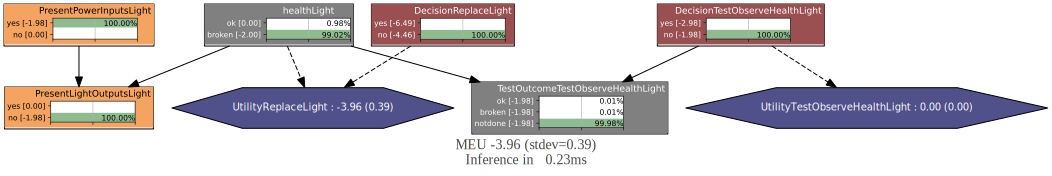

In [35]:
# when system not producing output + health indicates is broken > decision to replace is no

gnb.showInference(diagram, evs={
    "PresentPowerInputsLight":0,
    "PresentLightOutputsLight":1,
#    "healthLight":1,
#    "DecisionReplaceLight": "no",
#    "TestOutcomeTestObserveHealthLight":0,
#    "DecisionTestObserveHealthLight": "yes",
}, size=40)

### **Scenario:** reset preferences if broken, replace is preferred, change utility when ok to high values and prefer no replace


In [36]:
diagram.utility(diagram.idFromName("UtilityReplaceLight"))[0,0] = 50000
diagram.utility(diagram.idFromName("UtilityReplaceLight"))[0,1] = 100000
diagram.utility(diagram.idFromName("UtilityReplaceLight"))[1,0] = -2
diagram.utility(diagram.idFromName("UtilityReplaceLight"))[1,1] = -4

In [37]:
gnb.flow.row(diagram.utility("UtilityReplaceLight"))

- **Given:** evidence input power present: yes
- **And:** evidence light:no
- **When:** inference performed
- **Then:** belief health light:broken
- **And:** advice replace light:no

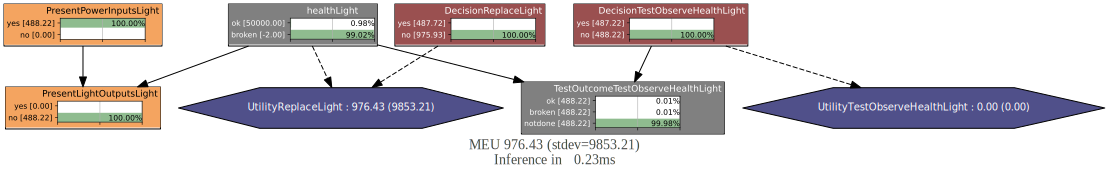

In [38]:
gnb.showInference(diagram, evs={
    "PresentPowerInputsLight":0,
    "PresentLightOutputsLight":1,
#    "healthLight":1,
#    "DecisionReplaceLight": "no",
#    "TestOutcomeTestObserveHealthLight":0,
#    "DecisionTestObserveHealthLight": "yes",
}, size=40)

### berekening UtilityReplaceLight

utility belief Health + replace yes berekening: .9902 * -2 + .0098 * 50000 = 488

utility belief health + replace no berekening: .9902 * -4 + .0098 * 100000 = 976,04

#### reset UtilityReplaceLight

In [39]:
diagram.utility(diagram.idFromName("UtilityReplaceLight"))[0,0] = -5
diagram.utility(diagram.idFromName("UtilityReplaceLight"))[0,1] = 0
diagram.utility(diagram.idFromName("UtilityReplaceLight"))[1,0] = -2
diagram.utility(diagram.idFromName("UtilityReplaceLight"))[1,1] = -4

In [40]:
gnb.flow.row(diagram.utility("UtilityReplaceLight"))

## validate modelling impact health on test Observe Health

Test aims to check the health of a light, simple example is to check if wire of light is broken. 

#### Following is taken from Joep Beurskens but edited, comments in red

##### modeling a test:
- Performing a test yields a test result that is modeled as a dummy random variable: Test, with states matching the various test results.  
<div class="mycomment"> Should test outcome already be in the initial diagram or should it be introduced when test is done? Test outcome can also be reflected by changing health if impact of testoutcome on health is 1:1?</div>
- The influence diagram includes a decision variable, T , with states (t1 = no, t2 = yes), denoting whether or not the test is suggested. 
- If the test is carried out, the outcome is made available to the decision-maker (link Testn to Dn). If, on the other hand, the test is not done, no test results are available. The link from Testn to Dn specifies that the value of Testn is known when making the corrective maintenance decision Dn.
<div class="mycomment"> Test outcome can also impact replacement decision via impact of outcome on health of a component? Belief in health is known before replacement decision is taken?</div>
- The influence diagram also includes a utility function, U ∈ U, that specifies the cost of the test.

##### value of the test:
The test establishes the value of information according to the extent to which it might **reduce the expected costs of uncertainty by reducing uncertainty** in the evidence base. This entails evaluating the expected value of a decision made with and without additional information. When payoffs are represented in monetary terms, an explicit monetary valuation of the expected value of information is provided, which may then be directly contrasted against the expected cost of information to evaluate if it is valuable. 
<div class="mycomment">How is the cost of a test reflecting uncertainty? Why is test decision utility not connected to health? This would reflect the fact the need to test increases when belief in health is lowered?</div>
<div class="img"><img src="pictures/afbeelding1.png" align="left" width="1000" height="600"></div>

##### alternatives modelling the not done state:
The link from Testn to Dn specifies that the value of Testn is known when making the corrective maintenance decision Dn. This cannot, however, be the case when the test is not performed. According to Kjærulff and Madsen (2008), there are two alternative options to correctly model the test result variable to behave as expected when the test is not performed. Both options consider the specification of the conditional probability distribution (CPT) P (T estn|Hn, Tn) in different ways. Table 5.3 handles this by specifying P (T estn|Hn, Tn = no) as a uniform distribution. Table 5.4 introduced an additional not done state, such that not performing the test instantiates that state.

<div class="img"><img src="pictures/afbeelding2.png" align="left" width="1000" height="600"></div>

The second option is more semantically clear than the first one because it is self-evident that if the test is not performed, Testn should be instantiated to not done. However, by introducing the additional not done state in the Testn variable, the model’s complexity increases. For the sake of convenience, it is chosen to continue with the latter option. 

##### impact outcome of the test:
Note that there is no uncertainty when performing a test, i.e., Tn = yes → P (T estn = pos) = 1 ∨ P (T estn = neg) = 1. The assessment of the value of information is called the “expected value of perfect information” (EVPI) because it quantifies the value of acquiring perfect information about all aspects of the decision (eliminating all uncertainty). This does not have to be the case that all the uncertainty of a variable is eliminated. **However, it is assumed that all tests are perfect.**
<div class="mycomment">If tests are perfect why not impact health directly?</div>

##### other testtypes:
Up till now the set of possible tests exists out of tests that test components in isolation, as seen in Figure 5.4. However, such a test may not exist for some triggers, such as T3. 
- An additional observation can be made by measuring the voltage at the wire ends. This test is likely cheaper than checking the health of each component individually, and it might improve the reliability of the model the most. 
The network will look like Figure 5.5 if the measurement tests (T6, T7) are included but not the trigger test (T3). Measuring a voltage at the output of Iwire1 indicates that it is likely that the trigger, wire2, or lamp is broken. While measuring no voltage indicates there is probably a defect in the battery and/or wire1, plus an additional chance (prior probability) that trigger, wire2, and lamp are also broken. See Appendix A for a visualization in the software of these scenarios.

<div class="img"><img src="pictures/afbeelding3.png" align="left" width="1000" height="600"></div>

The informational links from Test6 to D2 and from Test7 to D4 in Figure 5.5 indicate that the information is only available prior to making a decision on D2 and D4. However, this information is also available for all decisions. But limiting the number of information links is the main motivation of LIMID. Its solution is computationally tractable, whereas the same decision problem could be intractable if the no-forgetting condition is assumed. It is not always obvious which informational links to include in a LIMID without affecting the policies and the expected utility of the computed policies.
These are considered the building blocks for modeling the diagnosis network and are applicable to Model 2: Quadruple Light. Figure 5.6 depicts the augmented Bayesian network to an influence diagram of the network in Figure 4.6. Hence, it is assumed that every component can be tested in isolation, except for the connecting wires. These are modeled similarly to T6 and T7 (Figure 5.5), where the voltage at each wire end can be measured.

## inference via code met potentials en instantions

poging om utility te berekenen

In [ ]:
evs={
    "PresentPowerInputsLight":0,
    "PresentLightOutputsLight":1,
#    "healthLight":1,
#    "DecisionReplaceLight": "no",
#    "TestOutcomeTestObserveHealthLight":0,
#    "DecisionTestObserveHealthLight": "yes",
}

In [ ]:
ie = gum.ShaferShenoyLIMIDInference(diagram) 
ie.setEvidence(evs)
ie.makeInference()

In [ ]:
ie.MEU()["mean"]

In [ ]:
ie.optimalDecision('DecisionReplaceLight')

In [ ]:
ie.posterior("UtilityReplaceLight")

In [ ]:
# posterior tabel is een potential p
# loop door tabel levert een instantiation (index) i
# met index kan waarde in tabel worden opgevraagd: p.get(i)

def getOptimalDecision(ie):
    p = ie.posterior("DecisionReplaceLight")
    for i in p.loopIn():
        if (p.get(i) == 1.0):
            return i # type is Instantiation

In [ ]:
i = getOptimalDecision(ie)

In [ ]:
# get value of variable in Instantation
i["DecisionReplaceLight"]

In [ ]:
def calculateUtilityEU(ie, optDecisionI):
    h = optDecisionI.variablesSequence()[0].name()
    v = optDecisionI[h]

    pu = ie.posteriorUtility("UtilityReplaceLight")
    
    p2 = ie.posterior("UtilityReplaceLight")
    i = gum.Instantiation(p2)
    
    
# todo check of waarde wel voorkomt    
    
    while (not i.end()):
        if(i[h] == v):
            print(i)
            print(p2.get(i))
            i2 = i.copy()
        i.inc()
        
    
    

In [ ]:
calculateUtilityEU(ie, i)

In [ ]:
pu = ie.posteriorUtility("UtilityReplaceLight")
for i in pu.loopIn():
    print(i)

In [ ]:
p2 = ie.posterior("UtilityReplaceLight")

In [ ]:
i2 = gum.Instantiation(p2)

In [ ]:
a = i2.variablesSequence()

In [ ]:
if (l in a):
    print("yes")

In [ ]:
# loop potential > instantiations
# pyAgrum.Potential is a multi-dimensional array with a pyAgrum.DiscreteVariable associated to each dimension. It is used to represent probabilities and utilities tables in aGrUMs’ multidimensional (graphical) models with some conventions.
# Instantiation class which represents a multi-dimensionnal index

for t in ie.posterior("UtilityReplaceLight").loopIn():
    print(t)

In [ ]:
I = gum.Instantiation(ie.posterior("UtilityReplaceLight"))
print(I)
I.inc()
print(I)
print(ie.posterior("UtilityReplaceLight").get(I))
ie.posterior("UtilityReplaceLight").set(I, 0.1)

In [ ]:
ie.posterior("UtilityReplaceLight")


In [ ]:
l = gum.LabelizedVariable("UtilityOutput", "UtilityOutput", 1)

In [ ]:
I.chgVal("healthLight", 1)

In [ ]:
I.contains("healthLight")

In [ ]:
first = I.variable(0)
second = I.variable(1)

In [ ]:
I.nbrDim()

In [ ]:
I.val(first)

## addArc health > test utility

In [ ]:
diagram.addArc(diagram.idFromName("healthLight"), diagram.idFromName("UtilityTestObserveHealthLight"))
#diagram.eraseArc(diagram.idFromName("DecisionTestObserveHealthLight"), diagram.idFromName("TestOutcomeTestObserveHealthLight"))

In [ ]:
gnb.showInference(diagram, evs={
    "PresentPowerInputsLight":0,
    "PresentLightOutputsLight":1,
#    "healthLight":1,
#    "DecisionReplaceLight": "no",
    "TestOutcomeTestObserveHealthLight":0,
#    "DecisionTestObserveHealthLight": "yes",
}, size=40)

misschien moet testoutcome altijd als evidence meegegeven worden want het is geen belief punt?

In [ ]:
printUtilityTables(diagram, system)

In [ ]:
diagram.utility(diagram.idFromName("UtilityTestObserveHealthLight"))[0,0] = -5
diagram.utility(diagram.idFromName("UtilityTestObserveHealthLight"))[0,1] = 0
diagram.utility(diagram.idFromName("UtilityTestObserveHealthLight"))[1,0] = -2
diagram.utility(diagram.idFromName("UtilityTestObserveHealthLight"))[1,1] = -4

In [ ]:
diagram.cpt('TestOutcomeTestObserveHealthLight')[0, 0, 0] = 0.3
diagram.cpt('TestOutcomeTestObserveHealthLight')[0, 1, 0] = 0.3
diagram.cpt('TestOutcomeTestObserveHealthLight')[0, 0, 1] = 0.3
diagram.cpt('TestOutcomeTestObserveHealthLight')[0, 1, 1] = 0.3
diagram.cpt('TestOutcomeTestObserveHealthLight')[0, 0, 2] = 0.3
diagram.cpt('TestOutcomeTestObserveHealthLight')[0, 1, 2] = 0.3

diagram.cpt('TestOutcomeTestObserveHealthLight')[1, 0, 0] = 0.3
diagram.cpt('TestOutcomeTestObserveHealthLight')[1, 1, 0] = 0.3
diagram.cpt('TestOutcomeTestObserveHealthLight')[1, 0, 1] = 0.3
diagram.cpt('TestOutcomeTestObserveHealthLight')[1, 1, 1] = 0.3
diagram.cpt('TestOutcomeTestObserveHealthLight')[1, 0, 2] = 0.3
diagram.cpt('TestOutcomeTestObserveHealthLight')[1, 1, 2] = 0.3




In [ ]:
gnb.flow.row(diagram.cpt(diagram.idFromName("TestOutcomeTestObserveHealthLight")))

## add extra utility

In [ ]:
UtilityOutput=diagram.addUtilityNode(gum.LabelizedVariable("UtilityOutput", "UtilityOutput", 1))

In [ ]:
diagram.addArc(diagram.idFromName("PresentLightOutputsLight"), UtilityOutput)

In [ ]:
diagram.utility(UtilityOutput)[0] = 100 
diagram.utility(UtilityOutput)[1] = 0 

In [ ]:
# when evidence shows no light but input power present > belief health: broken

gnb.showInference(diagram, evs={
    "PresentPowerInputsLight":0,
    "PresentLightOutputsLight":1,
#    "healthLight":1,
#    "DecisionReplaceLight": "no",
#    "TestOutcomeTestObserveHealthLight":1,
#    "DecisionTestObserveHealthLight": "yes",
}, size=40)

In [ ]:
UtilityAggregate=diagram.addUtilityNode(gum.LabelizedVariable("UtilityAgg", "UtilityAgg", 1))

In [ ]:
diagram.addArc(diagram.idFromName("UtilityOutput"), diagram.idFromName("UtilityAgg"))
diagram.addArc(diagram.idFromName("UtilityReplaceLight"), diagram.idFromName("UtilityAgg"))